In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
%matplotlib inline

In [234]:
info=pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [235]:
info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [236]:
def description(column):
    return info.loc[column]['Description']

In [237]:
description('dti')

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [238]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [240]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [241]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## EDA 

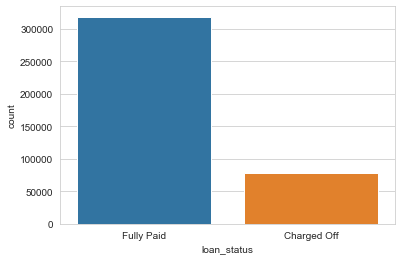

In [242]:
sns.set_style('whitegrid')
sns.countplot(df['loan_status'])

There is a significant difference in the number of defaulters vs non-defaulters. A huge number of people have fully paid their loans.

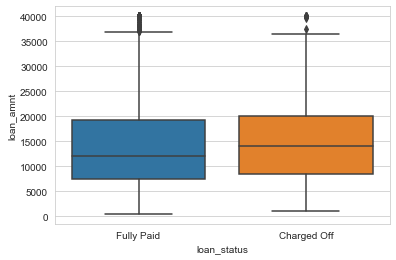

In [243]:


sns.boxplot('loan_status','loan_amnt',data=df)

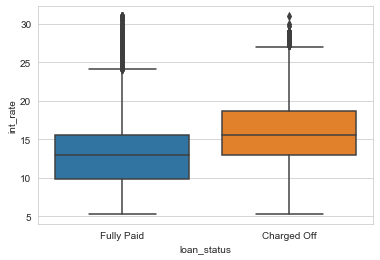

In [244]:
sns.boxplot('loan_status','int_rate',data=df)

In [245]:
description('installment')

'The monthly payment owed by the borrower if the loan originates.'

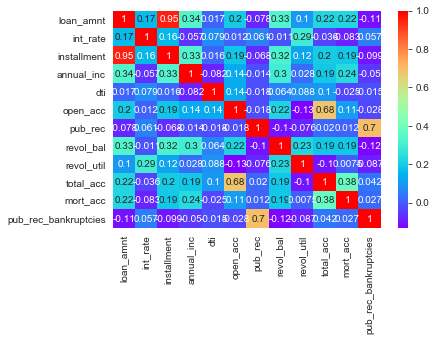

In [246]:
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

There is perfect correlation between loan amount and installment.

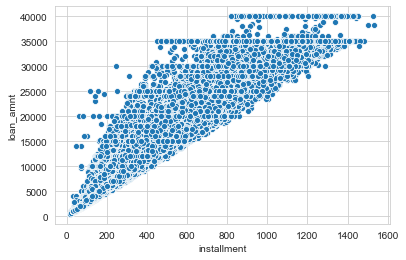

In [247]:
sns.scatterplot('installment','loan_amnt',data=df)

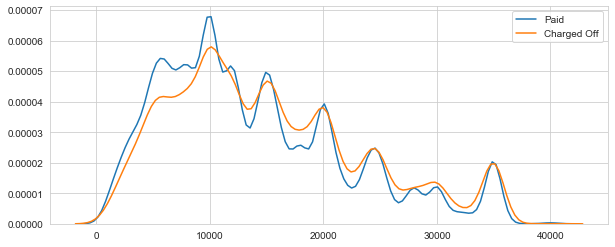

In [248]:
plt.figure(figsize=(10,4))
sns.kdeplot(df[df['loan_status']=='Fully Paid']['loan_amnt'],label='Paid')
sns.kdeplot(df[df['loan_status']=='Charged Off']['loan_amnt'],label='Charged Off')


In [249]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [250]:



df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

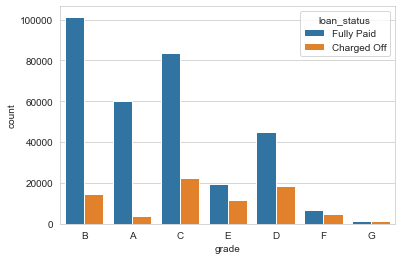

In [251]:
sns.countplot('grade',data=df,hue='loan_status')

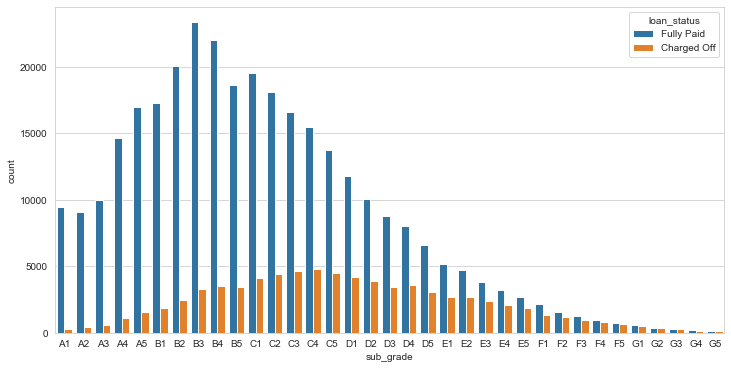

In [252]:
plt.figure(figsize=(12,6))
sns.countplot(df['sub_grade'].sort_values(),data=df,hue='loan_status')

Seems that grades F and G don't pay back that often. Let's recreate countplot just for those subgrades.

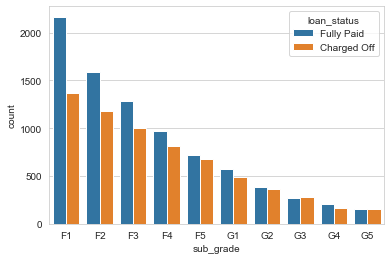

In [253]:
k=df['sub_grade'].sort_values()[df['sub_grade']>='F1']
sns.countplot(k,data=df,hue='loan_status')

In [254]:
df['loan_repaid']=df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

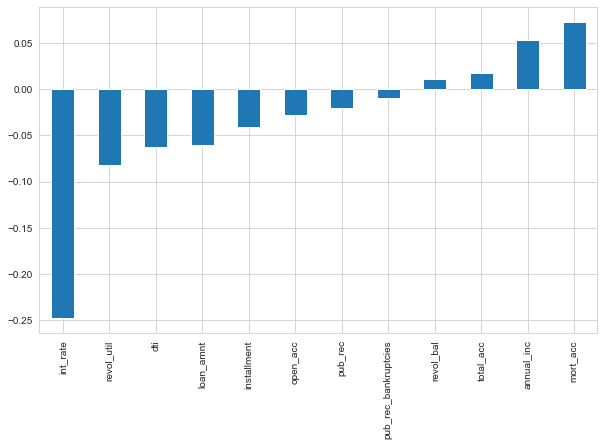

In [255]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

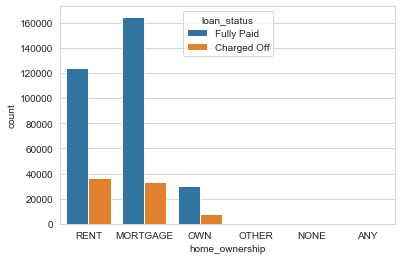

In [256]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])

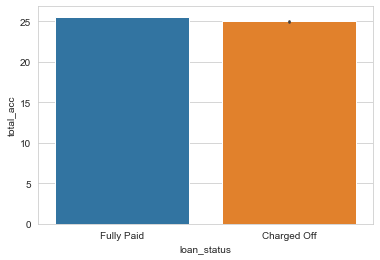

In [257]:
sns.barplot('loan_status','total_acc',data=df)

In [258]:
description('total_acc')

"The total number of credit lines currently in the borrower's credit file"

In [259]:
description('emp_length')

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

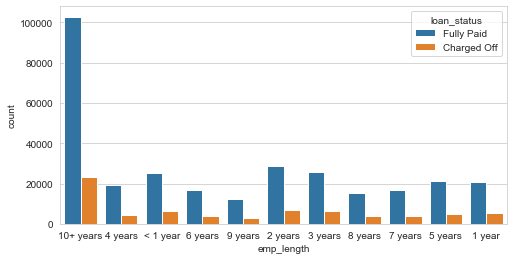

In [260]:
plt.figure(figsize=(8,4))
sns.countplot(df['emp_length'],hue=df['loan_status'])

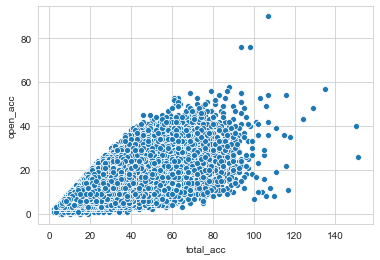

In [261]:
sns.scatterplot('total_acc','open_acc',data=df)

In [262]:
df['address'].unique()

array(['0174 Michelle Gateway\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\nNew Michael, FL 29597',
       '787 Michelle Causeway\nBriannaton, AR 48052'], dtype=object)

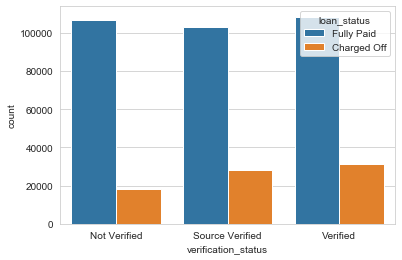

In [263]:
sns.countplot(df['verification_status'],hue=df['loan_status'])

In [264]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [265]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

## PRE-PROCESSING

In [266]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing data

In [267]:
len(df)

396030

In [268]:
df.isna().sum()*100/len(df) # percent missing values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [269]:
df['emp_title'].nunique()

173105

There are too many unique job titles to convert this into a dummy variaible feature. Let's remove this column.

In [270]:
df.drop('emp_title',axis=1,inplace=True)

In [271]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

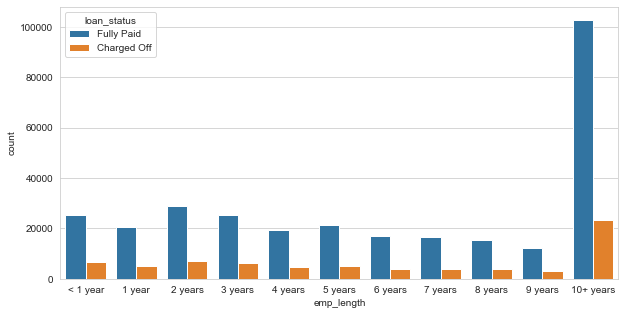

In [272]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'],hue=df['loan_status'],order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

This still doesn't inform us anything regarding the relationship between emp_length and charged off.
So, let's observe what percent in each category is charged off.

In [273]:
charged=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [274]:

total=df.groupby('emp_length').count()['loan_status']

In [275]:
charge=charged/total

In [276]:
charge

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

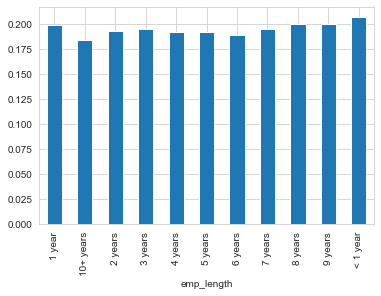

In [277]:
charge.plot(kind='bar')

Charge off rates are extremely similar across all emp. lengths. So, let's drop 'emp_length' column.

In [278]:
df.drop('emp_length',axis=1,inplace=True)

In [279]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


title column is just description of purpose column. So, let's drop title column.

In [280]:
df.drop('title',axis=1,inplace=True)

In [281]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [282]:
description('mort_acc')

'Number of mortgage accounts.'

In [283]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


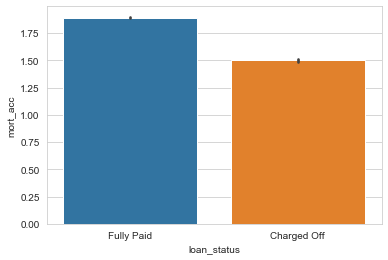

In [284]:
sns.barplot('loan_status','mort_acc',data=df)

In [285]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [286]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

total_acc correlates with mort_acc column. So, let's fill missing values by grouping total_acc values and taking mean of mort_acc values.

In [287]:
mort_values=df.groupby('total_acc').mean()['mort_acc']

In [288]:
mort_values[5]
        

0.10328947368421053

In [289]:
def fill_mort_na(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mort_values[total_acc]
    else:
        return mort_acc

In [290]:
df['mort_acc']=df.apply(lambda x:fill_mort_na(x['total_acc'],x['mort_acc']),axis=1)

In [291]:
df['mort_acc'].isnull().sum()

0

In [292]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

Missing data in columns revol_util and pub_rec_bankruptcies is less than 0.2%. Let's remove the rows that contain missing data.

In [293]:
df.dropna(inplace=True)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

## Categorical Variables

In [295]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [296]:
df.select_dtypes(include='object').columns #Non-numeric columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [297]:
df['term']=df['term'].str.extract('(\d+)')

In [298]:
df['term']=df['term'].astype(int)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int32  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

Since, grade is already included in sub_grade column, let's drop this column.

In [300]:
df.drop('grade',axis=1,inplace=True)

In [301]:
df['sub_grade'].nunique()

35

In [302]:
df=pd.get_dummies(df,columns=['sub_grade'],drop_first=True)

In [303]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Let's replace None and Any with OTHER so that we are left with 4 unique values of the home ownership column.

In [304]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [305]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [306]:
df.select_dtypes(include='object').head()

,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [307]:
df=pd.get_dummies(df,columns=['home_ownership','verification_status','purpose','initial_list_status','application_type'],drop_first=True)

In [308]:
description('issue_d')

'The month which the loan was funded'

In [309]:
df.drop('issue_d',axis=1,inplace=True)

In [310]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [311]:
df['zipcode']=df['address'].apply(lambda x: x.split()[-1])

In [312]:
df=pd.get_dummies(df,columns=['zipcode'],drop_first=True)

In [313]:
df.drop('address',axis=1,inplace=True)

In [314]:
description('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [315]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: x[-4:])

In [316]:
df['earliest_cr_year']=df['earliest_cr_year'].apply(lambda x: int(x[-4:]))

In [317]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [318]:
df.select_dtypes(include='object')

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off
...,...
396025,Fully Paid
396026,Fully Paid
396027,Fully Paid
396028,Fully Paid


## Train-test-split

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
df=df.drop('loan_status',axis=1)
X= df.drop('loan_repaid',axis=1).values

In [321]:
y= df['loan_repaid'].values

In [322]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


In [323]:
X

array([[1.000e+04, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [8.000e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        2.004e+03],
       [1.560e+04, 3.600e+01, 1.049e+01, ..., 0.000e+00, 0.000e+00,
        2.007e+03],
       ...,
       [5.000e+03, 3.600e+01, 9.990e+00, ..., 0.000e+00, 0.000e+00,
        1.997e+03],
       [2.100e+04, 6.000e+01, 1.531e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [2.000e+03, 3.600e+01, 1.361e+01, ..., 0.000e+00, 0.000e+00,
        1.998e+03]])

In [324]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalization

In [326]:
from sklearn.preprocessing import MinMaxScaler

In [327]:
scaler=MinMaxScaler()

In [328]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Creating Model


In [329]:
from tensorflow.keras.models import Sequential

In [330]:
from tensorflow.keras.layers import Dense,Dropout

In [331]:
model= Sequential()
# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.4))
# hidden layer 1
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.4))
# hidden layer 2
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.4))
# output layer
model.add(Dense(1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy',optimizer='adam')

In [332]:
from tensorflow.keras.callbacks import EarlyStopping

In [333]:
earlystop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [334]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=earlystop,batch_size=256)

Epoch 1/600
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3242 - val_loss: 0.2652
Epoch 2/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2703 - val_loss: 0.2635
Epoch 3/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2659 - val_loss: 0.2636
Epoch 4/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2646 - val_loss: 0.2635
Epoch 5/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2638 - val_loss: 0.2629
Epoch 6/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2628 - val_loss: 0.2628
Epoch 7/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2624 - val_loss: 0.2628
Epoch 8/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2622 - val_loss: 0.2624
Epoch 9/600
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2619 - val_loss: 0.2630
Epoch 10/600
1236/1236 [==============================] - 5s 4ms/step - l

In [335]:
losses=pd.DataFrame(model.history.history)

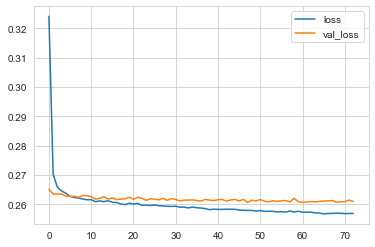

In [336]:
losses.plot()

## Saving the model

In [337]:
from tensorflow.keras.models import load_model

In [338]:
model.save('model1.h5')

## Model Evaluation


In [339]:
from sklearn.metrics import classification_report, confusion_matrix

In [340]:
pred=model.predict_classes(X_test)

In [341]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [342]:
print(confusion_matrix(y_test,pred))

[[ 6760  8898]
 [   32 63354]]


 ## Checking a random record

In [344]:
import random
random.seed(101)

In [345]:
random_ind=random.randint(0,len(df))

In [350]:
new_cust=df.drop('loan_repaid',axis=1).iloc[random_ind]

In [351]:
new_cust.values.shape

(78,)

In [353]:
model.predict_classes(new_cust.values.reshape(1,78))

array([[1]])

In [354]:
df.iloc[random_ind]['loan_repaid']

1.0